Name: Avani Gupta <br>
Roll: 2019121004

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def display_img_arr(img_arr, r, c, dim,titles_arr):
    fl = 0
    fig = plt.figure(figsize = dim)
    for i in range(r):
        for j in range(c):
            if len(img_arr) == fl:
                break
            ax1 = fig.add_subplot(r, c, fl + 1)
            ax1.set_title(titles_arr[fl], fontsize = 20)
            ax1.imshow(img_arr[fl], cmap = 'gray')
            fl = fl + 1
    plt.show()

In [3]:
def match(img, SE):
    rows = img.shape[0]
    cols = img.shape[1]
    for i in range(rows):
        for j in range(cols):
            im_cur = img[i][j]
            if SE[i][j] == im_cur:
                continue
            if SE[i][j] == -1:
                continue
            return 0
    return 1

In [4]:
def skeletonize(img, SE):
    output_img = img.copy()
    rows = img.shape[0]
    cols = img.shape[1]
    m = SE.shape[0]
    n = SE.shape[1]
    
    for i in range(rows):
        for j in range(cols):
            if (i - int( m/ 2)) >= 0 and (i + int(m / 2)) < rows and (j - int(n / 2)) >= 0 and (j + int(n / 2)) < cols:
                img_slice = img[i - int(m / 2): i + int(m / 2) + 1, j - int(n / 2): j + int(n / 2) + 1]
                if match(img_slice, SE) == 1:
                    output_img[i][j] = 0
    return output_img

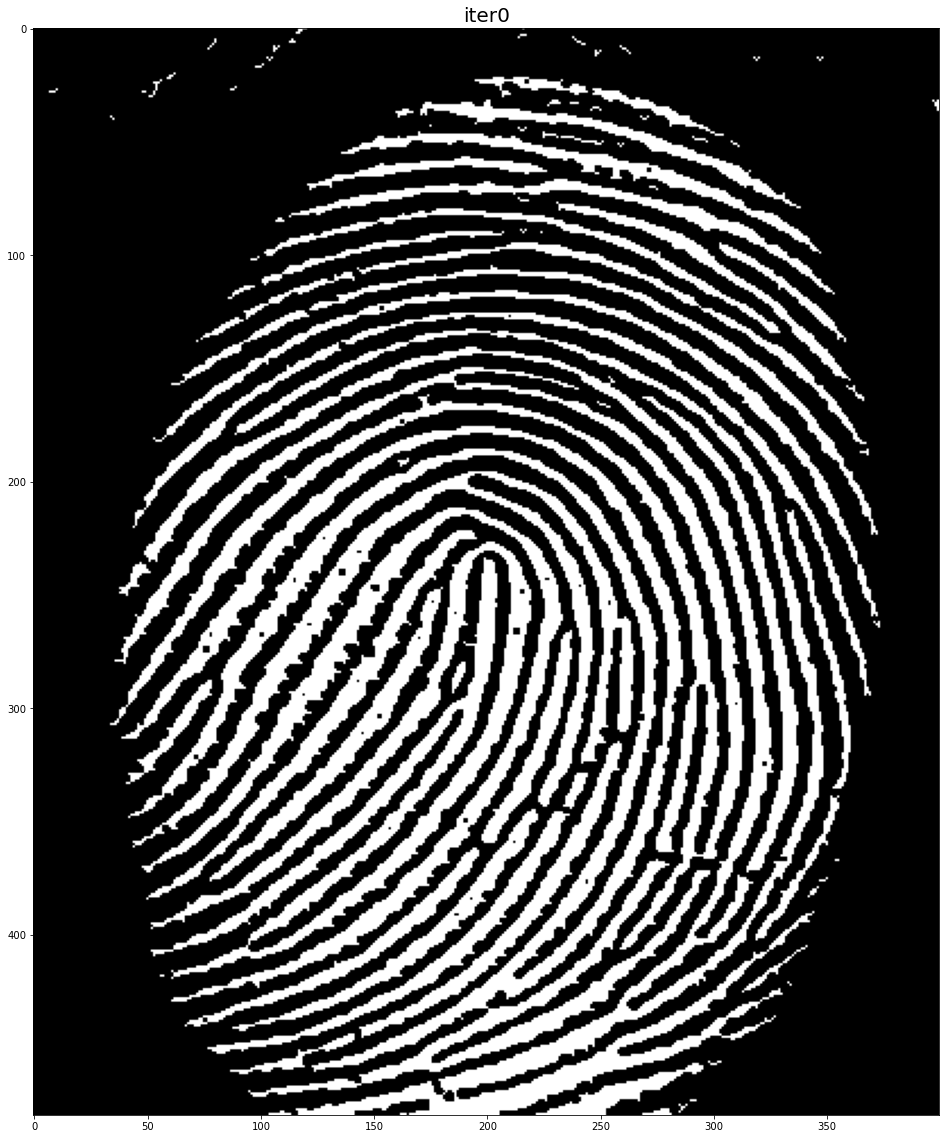

at iter 0 error 0.10381770833333333
at iter 1 error 0.09591145833333334
at iter 2 error 0.06761979166666666
at iter 3 error 0.035203125
at iter 4 error 0.011630208333333333
at iter 5 error 0.0026145833333333333
at iter 6 error 0.0004895833333333333
at iter 7 error 0.00011979166666666666


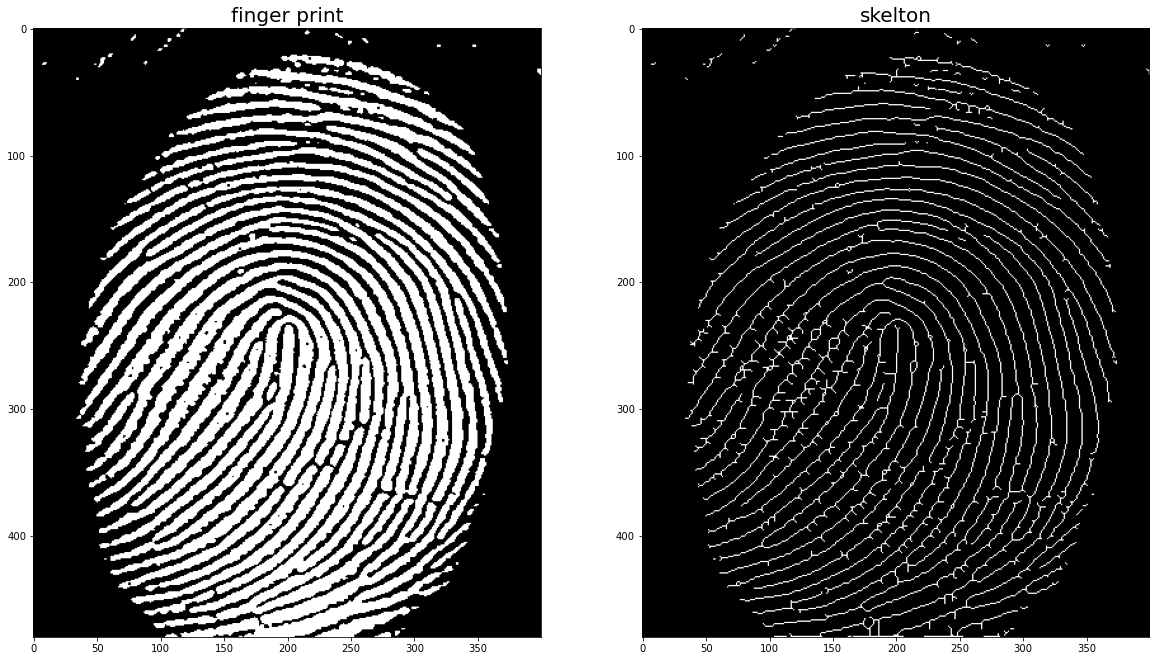

In [5]:
def skeletonization(img,S1,S2,thresh):
    prev = img
    itrs = 0
    
    while itrs<100:
        for i in range(4):
            img = skeletonize(skeletonize(img, S1), S2)
            S1 = np.rot90(S1)
            S2 = np.rot90(S2)
        delta = np.abs(prev - img)    
        delta = np.mean(delta)
        if delta < thresh:
            break
        else:
            if(itrs%20==0 and i!=0):
                display_img_arr([img], 1, 1, (20, 20), ['iter'+str(itrs)])
            print('at iter',itrs,'error',delta)
        prev = img
        itrs += 1
    return img


img = cv2.imread('../images/thumb_print.jpg', cv2.IMREAD_GRAYSCALE)

img = (img < 127).astype(np.uint8)
images = []
images.append(img)
SE1 = np.array([[0, 0, 0], [-1, 1, -1], [1, 1, 1]])
SE2 = np.array([[-1, 0, 0], [1, 1, 0], [-1, 1, -1]])

ske_img = skeletonization(img,SE1,SE2,0.0001)
images.append(ske_img)
display_img_arr(images, 1, 2, (20, 20), ['finger print','skelton'])


### Part 2
- Role of S1 and it's variations is to detect edges and curve like edges
- Role of S2 and variations of S2 is to detect right angles 

### Part 3
- Rotating the structural elements helps to detect horizontal as well as vertical edges and curves.
- As number of passes increase, we get more finer looking skeleton of the image. After a certain number of iterations, the change between successive iterations tends to zero.

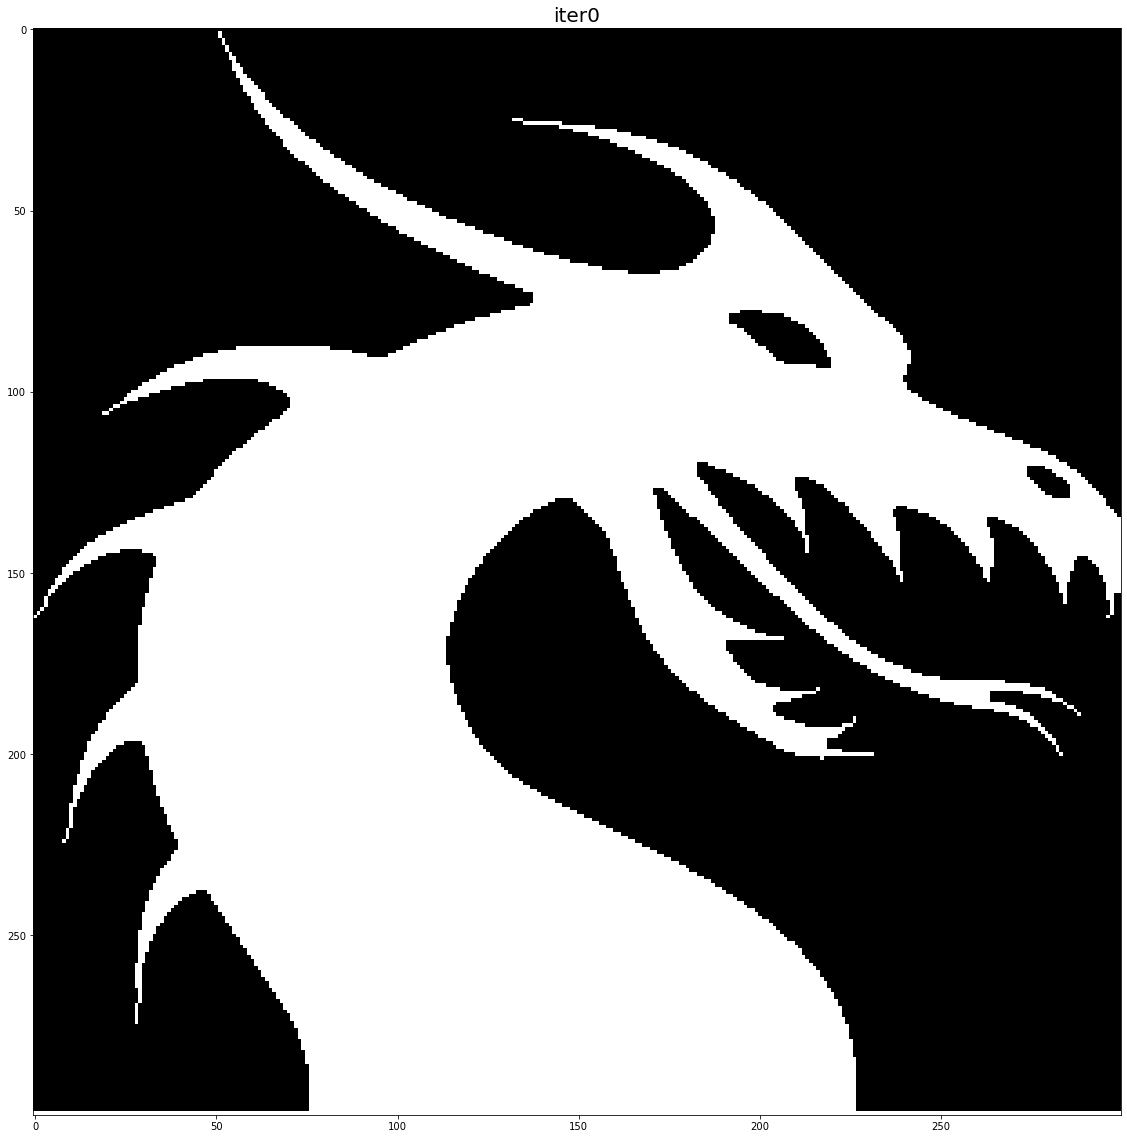

at iter 0 error 0.02202222222222222
at iter 1 error 0.020666666666666667
at iter 2 error 0.018833333333333334
at iter 3 error 0.016866666666666665
at iter 4 error 0.015122222222222223
at iter 5 error 0.013333333333333334
at iter 6 error 0.012066666666666667
at iter 7 error 0.011644444444444445
at iter 8 error 0.011277777777777777
at iter 9 error 0.0106
at iter 10 error 0.009855555555555555
at iter 11 error 0.009411111111111111
at iter 12 error 0.008722222222222221
at iter 13 error 0.008077777777777777
at iter 14 error 0.007922222222222223
at iter 15 error 0.007744444444444444
at iter 16 error 0.007311111111111111
at iter 17 error 0.006988888888888889
at iter 18 error 0.006877777777777778
at iter 19 error 0.0068111111111111115


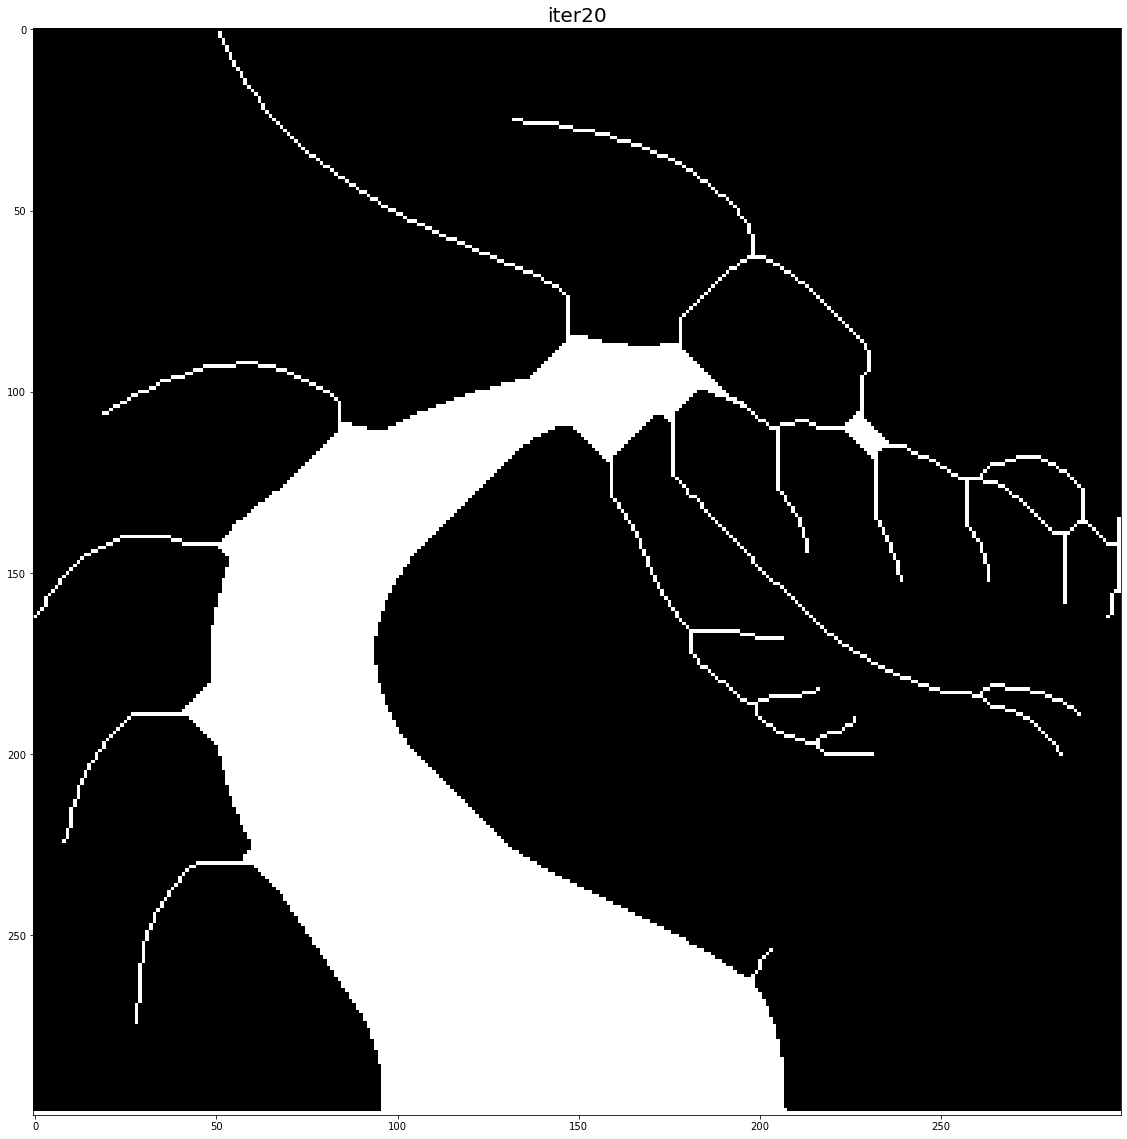

at iter 20 error 0.006733333333333333
at iter 21 error 0.0064333333333333334
at iter 22 error 0.006311111111111111
at iter 23 error 0.006166666666666667
at iter 24 error 0.006111111111111111
at iter 25 error 0.005988888888888889
at iter 26 error 0.005966666666666667
at iter 27 error 0.005944444444444444
at iter 28 error 0.0059
at iter 29 error 0.005833333333333334
at iter 30 error 0.005622222222222222
at iter 31 error 0.005355555555555555
at iter 32 error 0.005177777777777778
at iter 33 error 0.005055555555555555
at iter 34 error 0.0049
at iter 35 error 0.004733333333333333
at iter 36 error 0.004566666666666667
at iter 37 error 0.0044
at iter 38 error 0.004355555555555555
at iter 39 error 0.004277777777777778


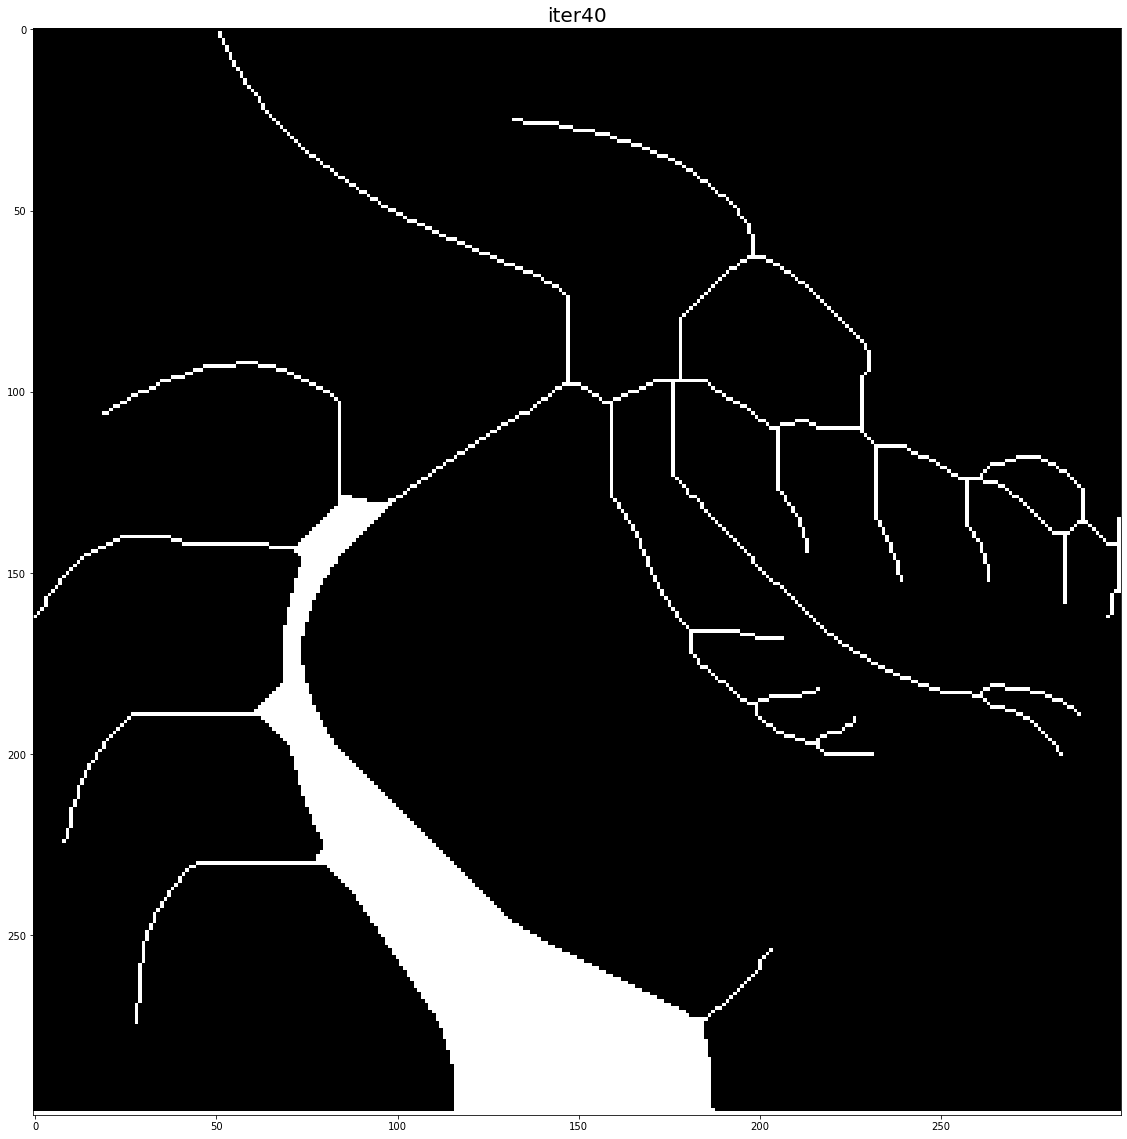

at iter 40 error 0.0041555555555555556
at iter 41 error 0.0041
at iter 42 error 0.004033333333333333
at iter 43 error 0.003611111111111111
at iter 44 error 0.0033
at iter 45 error 0.0031
at iter 46 error 0.0029666666666666665
at iter 47 error 0.002811111111111111
at iter 48 error 0.0024222222222222223
at iter 49 error 0.0023333333333333335
at iter 50 error 0.0022555555555555554
at iter 51 error 0.0021666666666666666
at iter 52 error 0.002111111111111111
at iter 53 error 0.002011111111111111
at iter 54 error 0.0019555555555555554
at iter 55 error 0.0018222222222222223
at iter 56 error 0.0018
at iter 57 error 0.0017666666666666666
at iter 58 error 0.0016444444444444445
at iter 59 error 0.001411111111111111


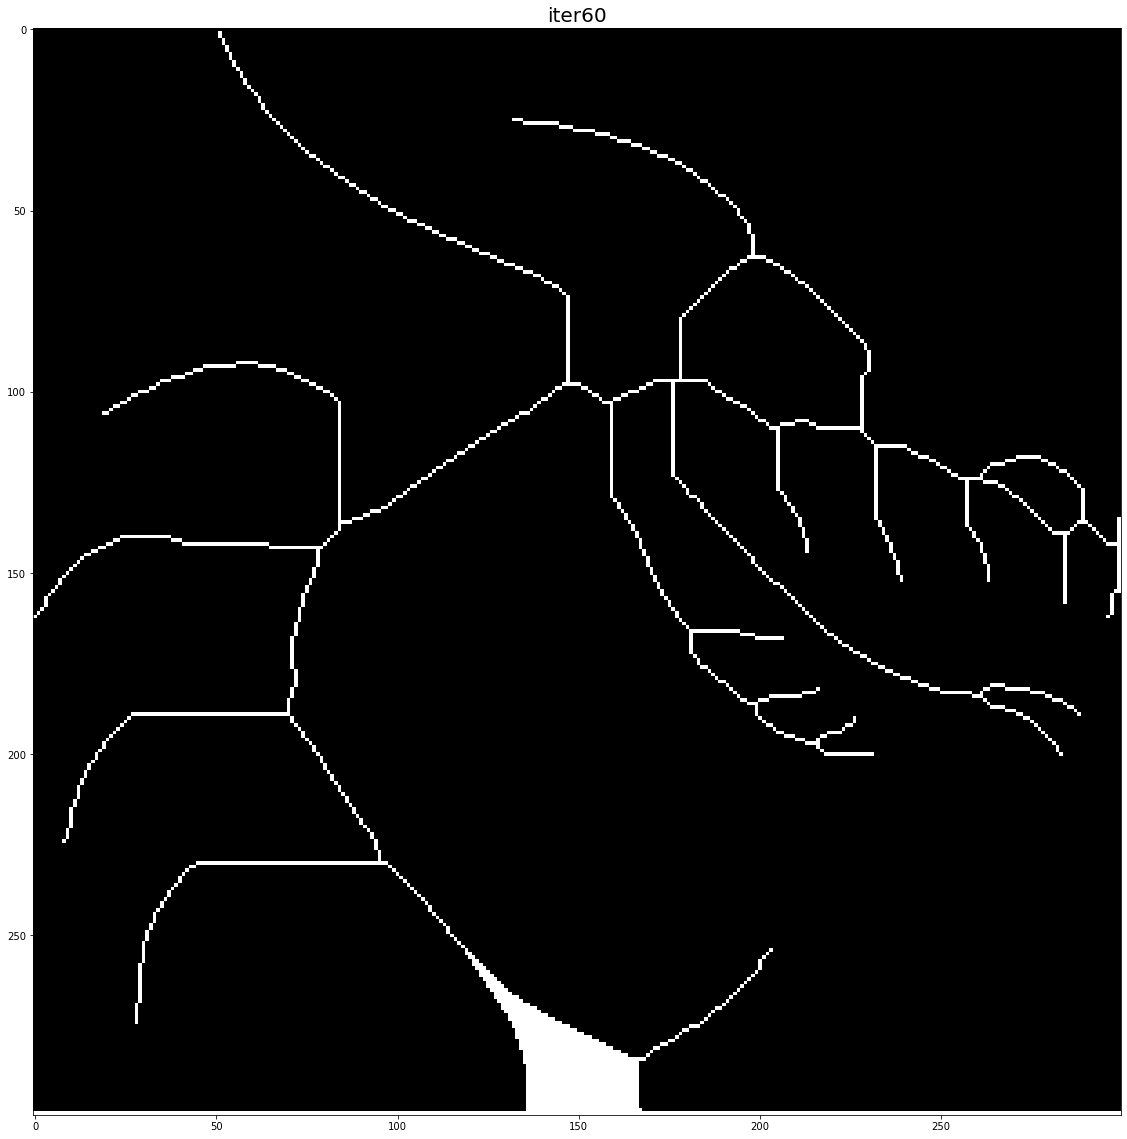

at iter 60 error 0.0012444444444444445
at iter 61 error 0.0011222222222222222
at iter 62 error 0.0009666666666666667
at iter 63 error 0.0008444444444444444
at iter 64 error 0.0007444444444444445
at iter 65 error 0.0006888888888888888
at iter 66 error 0.0006111111111111111
at iter 67 error 0.0005555555555555556
at iter 68 error 0.0005
at iter 69 error 0.00045555555555555556
at iter 70 error 0.00038888888888888887
at iter 71 error 0.0003444444444444444
at iter 72 error 0.0002888888888888889
at iter 73 error 0.0002555555555555556
at iter 74 error 0.00018888888888888888
at iter 75 error 0.00016666666666666666


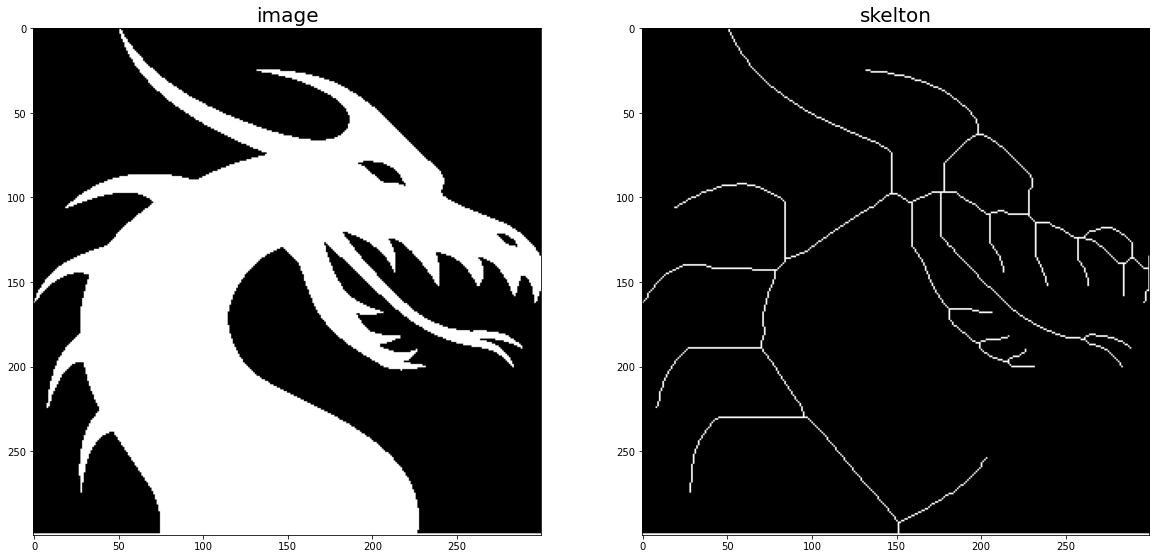

In [6]:
img = cv2.imread('../images/dragon.png', 0)
img = 255- img
img = (img < 127).astype(np.uint8)
images = []
images.append(img)
SE1 = np.array([[0, 0, 0], [-1, 1, -1], [1, 1, 1]])
SE2 = np.array([[-1, 0, 0], [1, 1, 0], [-1, 1, -1]])

ske_img = skeletonization(img,SE1,SE2,0.00005)
images.append(ske_img)
display_img_arr(images, 1, 2, (20, 20), ['image','skelton'])

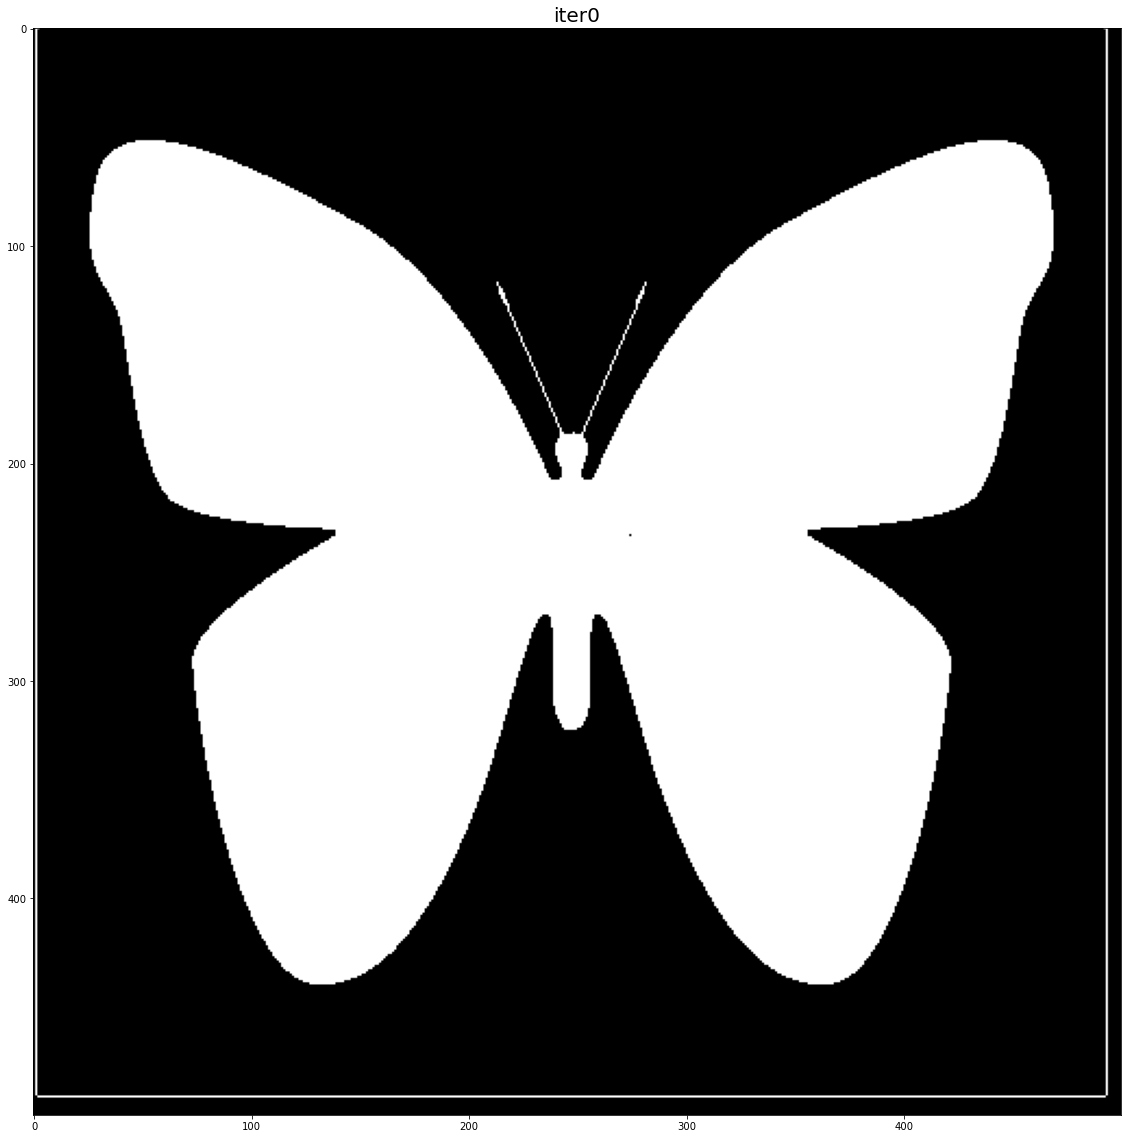

at iter 0 error 0.008432
at iter 1 error 0.00788
at iter 2 error 0.007804
at iter 3 error 0.007748
at iter 4 error 0.00774
at iter 5 error 0.007692
at iter 6 error 0.0076
at iter 7 error 0.007556
at iter 8 error 0.007448
at iter 9 error 0.007184
at iter 10 error 0.007108
at iter 11 error 0.00706
at iter 12 error 0.00706
at iter 13 error 0.007008
at iter 14 error 0.007008
at iter 15 error 0.006964
at iter 16 error 0.006932
at iter 17 error 0.006888
at iter 18 error 0.006864
at iter 19 error 0.00686


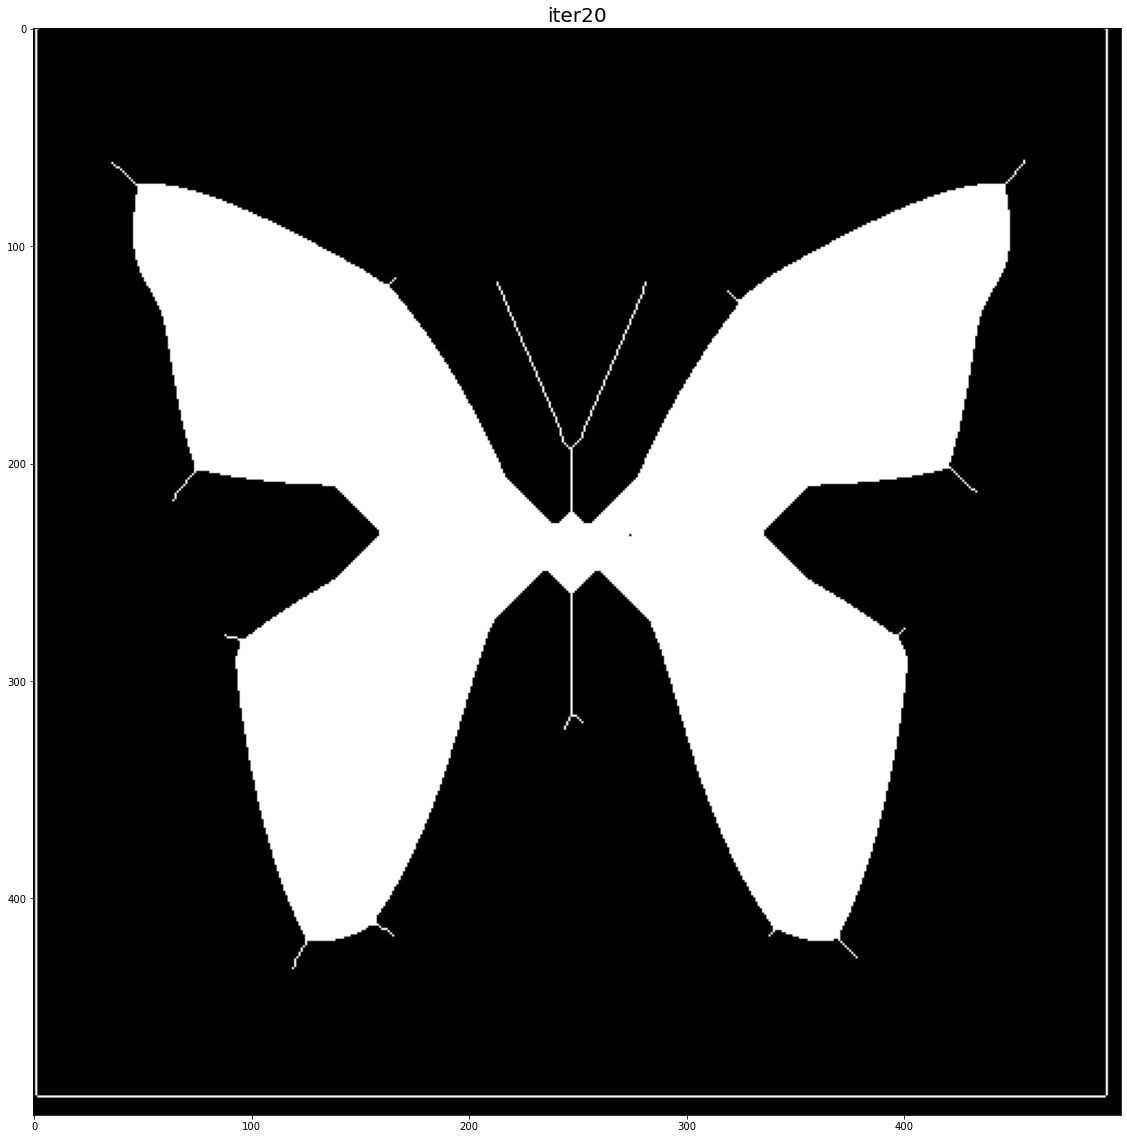

at iter 20 error 0.006804
at iter 21 error 0.0068
at iter 22 error 0.006772
at iter 23 error 0.0067
at iter 24 error 0.0067
at iter 25 error 0.006632
at iter 26 error 0.006632
at iter 27 error 0.006572
at iter 28 error 0.006536
at iter 29 error 0.006516
at iter 30 error 0.006464
at iter 31 error 0.006408
at iter 32 error 0.006372
at iter 33 error 0.006272
at iter 34 error 0.006144
at iter 35 error 0.006116
at iter 36 error 0.006024
at iter 37 error 0.00596
at iter 38 error 0.005892
at iter 39 error 0.005832


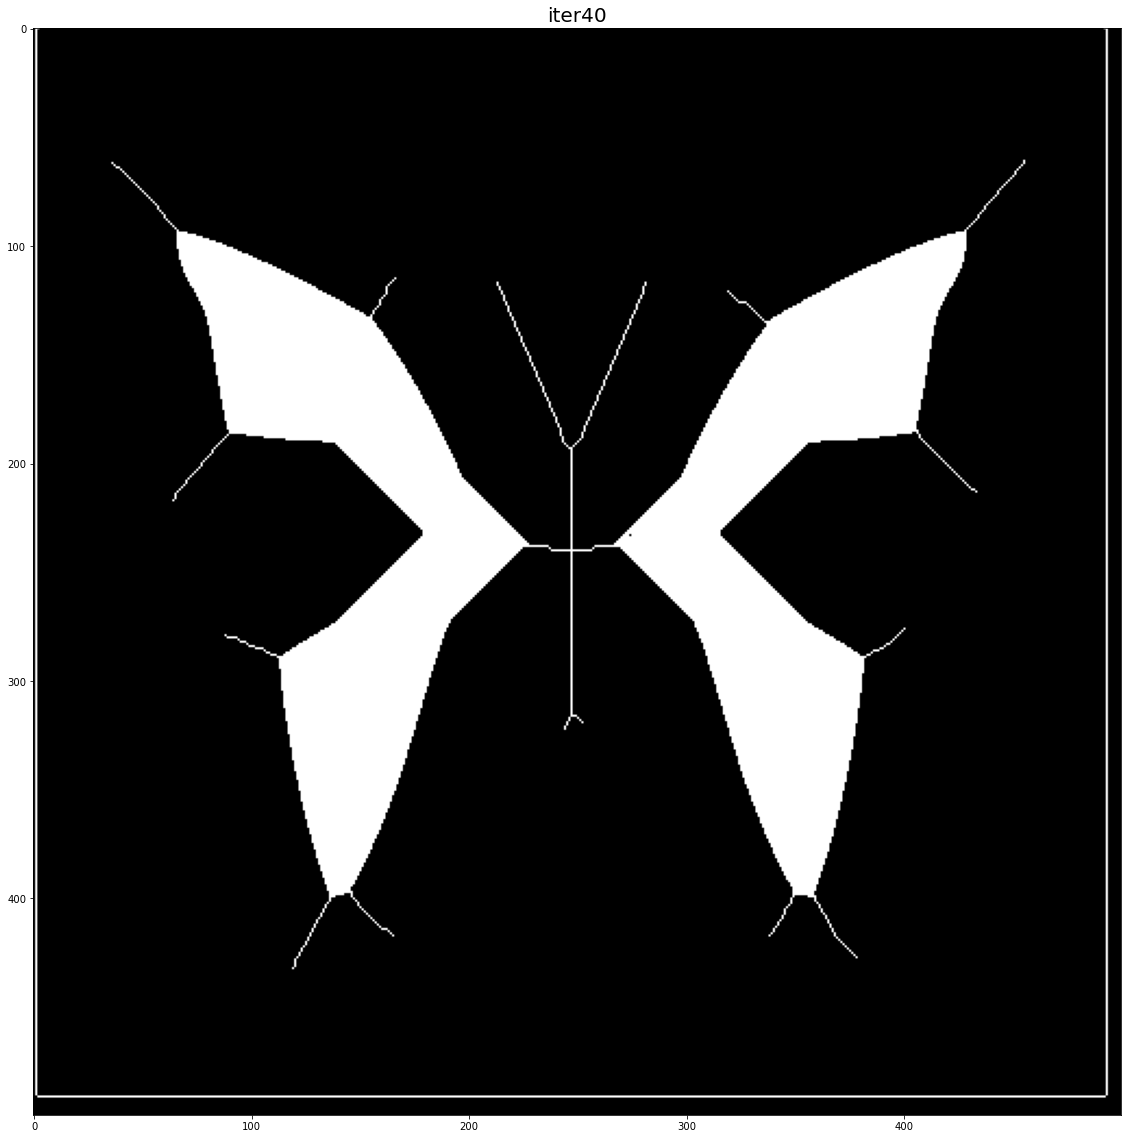

at iter 40 error 0.00576
at iter 41 error 0.00568
at iter 42 error 0.005644
at iter 43 error 0.00558
at iter 44 error 0.005508
at iter 45 error 0.005436
at iter 46 error 0.005396
at iter 47 error 0.005336
at iter 48 error 0.005256
at iter 49 error 0.005204
at iter 50 error 0.005124
at iter 51 error 0.005032
at iter 52 error 0.004948
at iter 53 error 0.004856
at iter 54 error 0.004788
at iter 55 error 0.004672
at iter 56 error 0.004588
at iter 57 error 0.004484
at iter 58 error 0.004404
at iter 59 error 0.004296


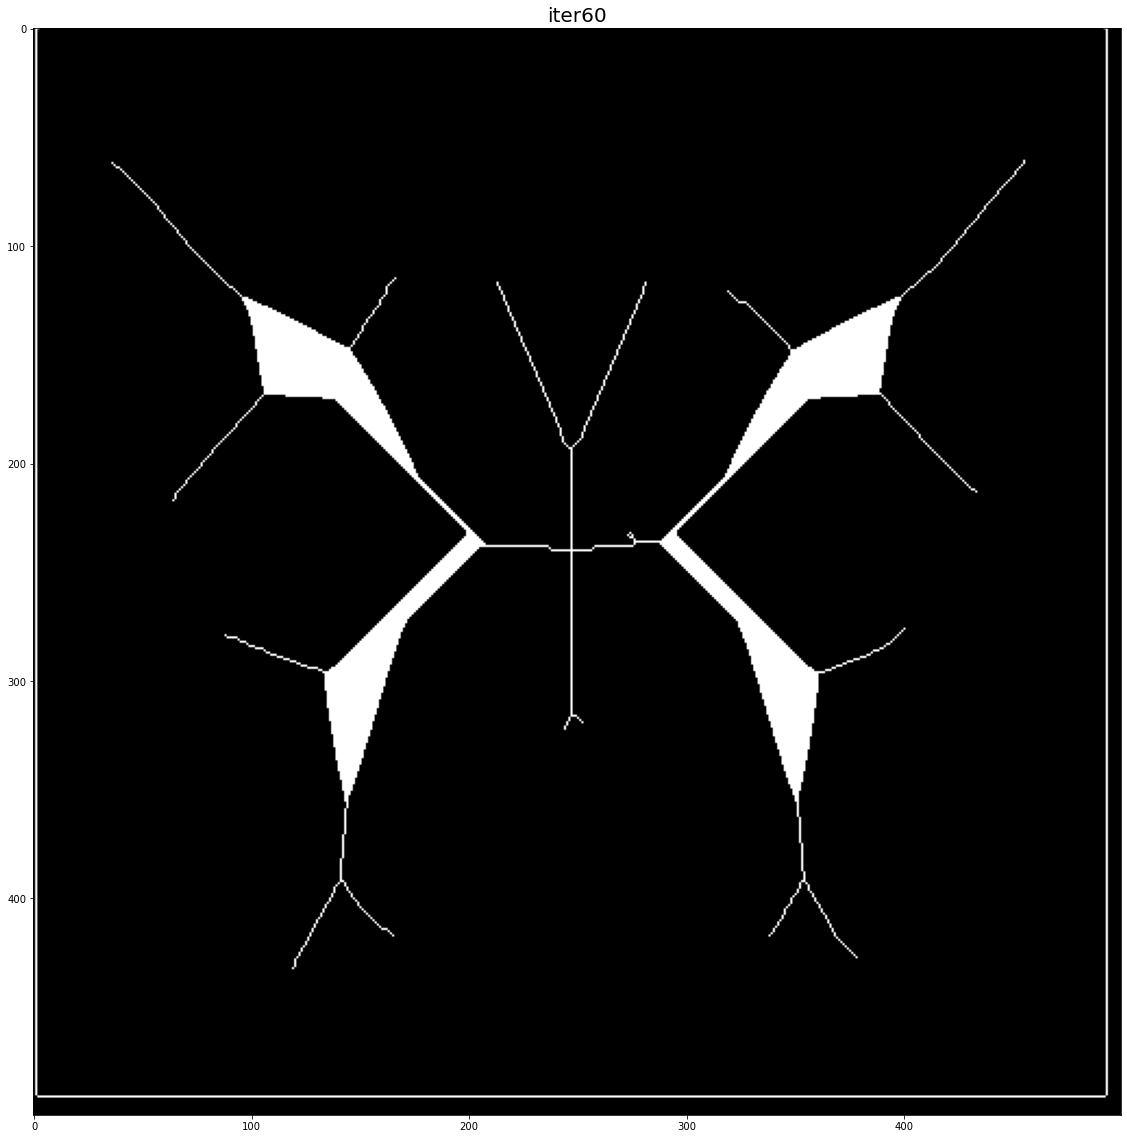

at iter 60 error 0.0042
at iter 61 error 0.004068
at iter 62 error 0.003544
at iter 63 error 0.00338
at iter 64 error 0.003172
at iter 65 error 0.003
at iter 66 error 0.002532
at iter 67 error 0.002032
at iter 68 error 0.001788
at iter 69 error 0.001576
at iter 70 error 0.001348
at iter 71 error 0.001116
at iter 72 error 0.0009
at iter 73 error 0.000648
at iter 74 error 0.000428
at iter 75 error 0.000244
at iter 76 error 0.00016
at iter 77 error 4.4e-05


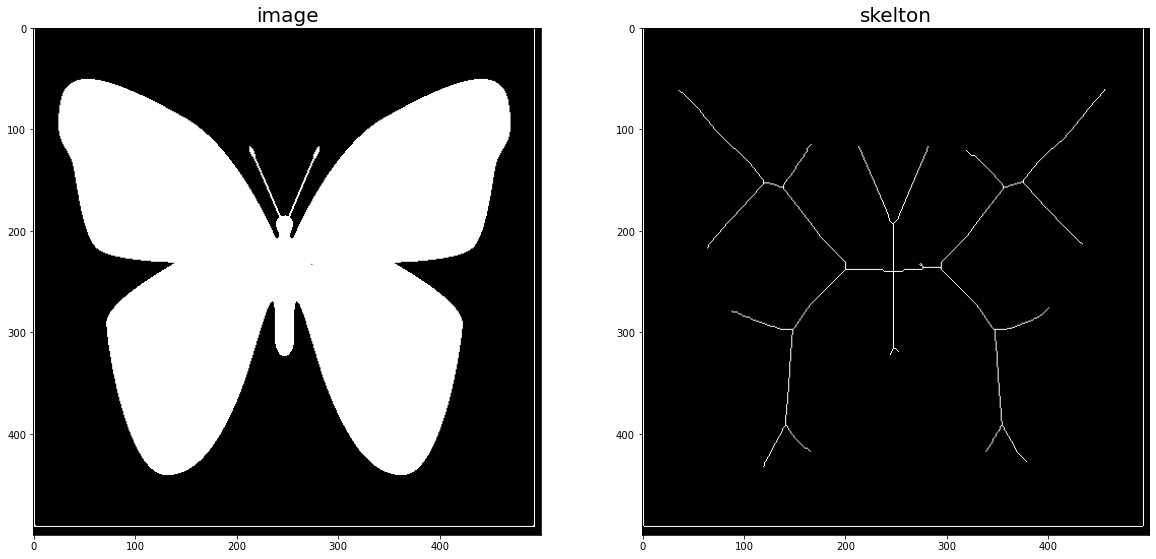

In [8]:
img = cv2.imread('../images/butterfly.jpg', 0)
img = 255- img
img = (img < 127).astype(np.uint8)
images = []
images.append(img)
ske_img = skeletonization(img,SE1,SE2,0.00001)
images.append(ske_img)
display_img_arr(images, 1, 2, (20, 20), ['image','skelton'])

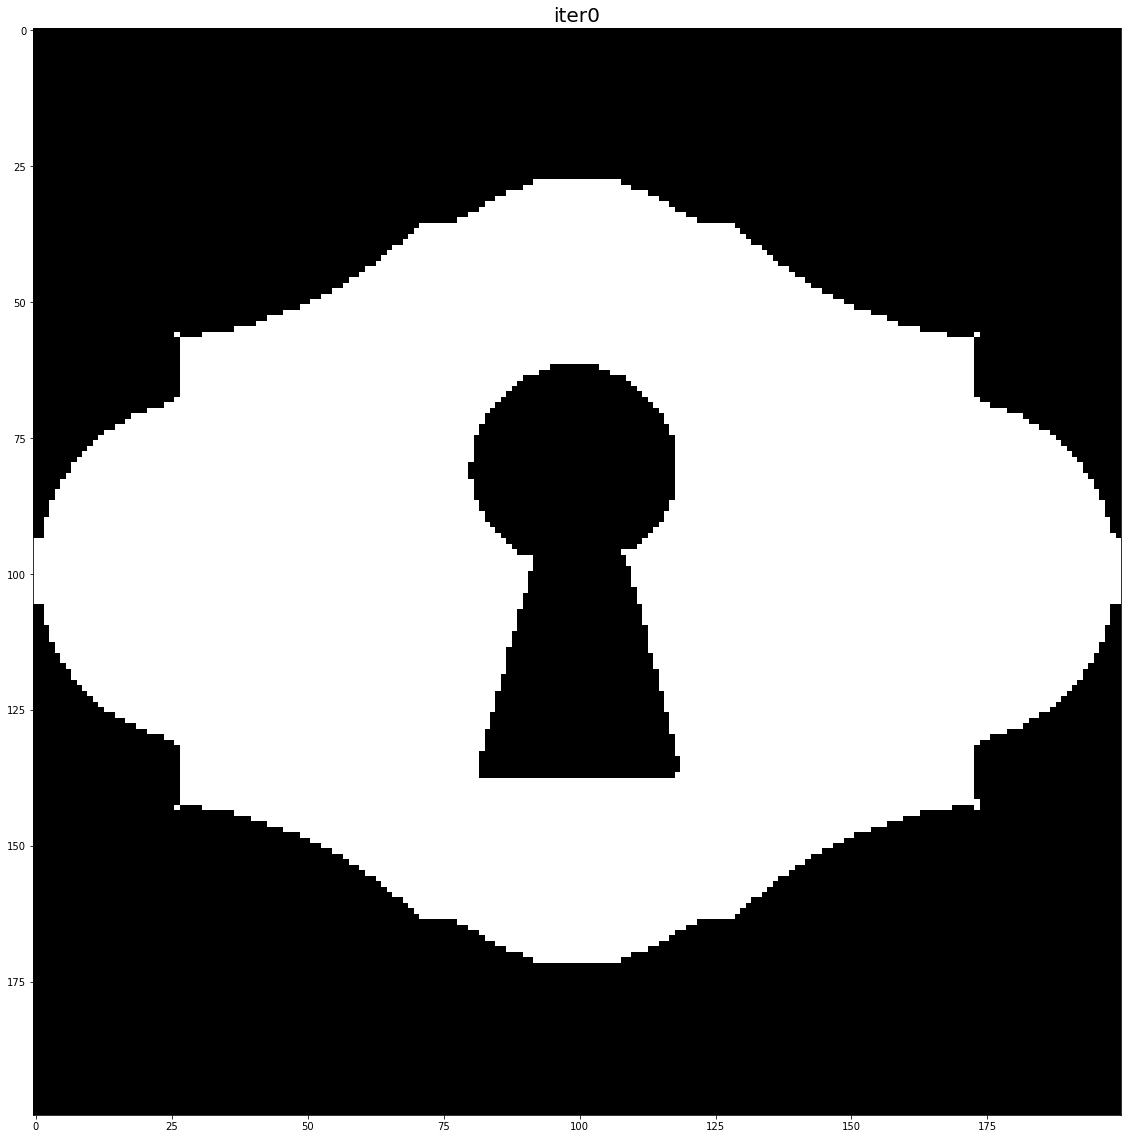

at iter 0 error 0.016375
at iter 1 error 0.016575
at iter 2 error 0.016525
at iter 3 error 0.01645
at iter 4 error 0.0166
at iter 5 error 0.0167
at iter 6 error 0.016625
at iter 7 error 0.0166
at iter 8 error 0.016375
at iter 9 error 0.01605
at iter 10 error 0.0163
at iter 11 error 0.01605
at iter 12 error 0.015725
at iter 13 error 0.015975
at iter 14 error 0.015825
at iter 15 error 0.01535
at iter 16 error 0.014575
at iter 17 error 0.0132
at iter 18 error 0.011975
at iter 19 error 0.01055


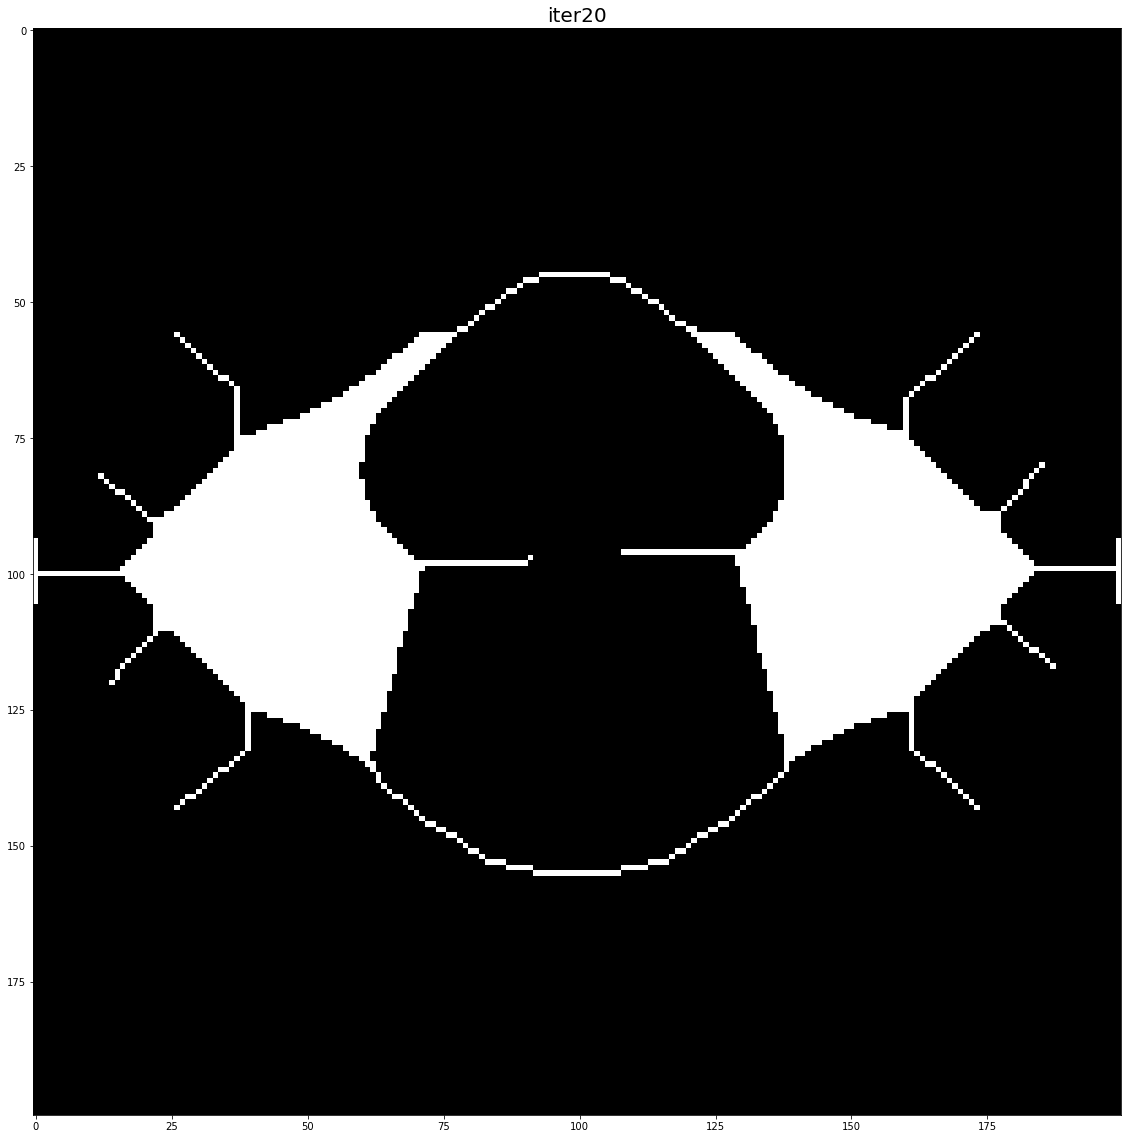

at iter 20 error 0.009775
at iter 21 error 0.009125
at iter 22 error 0.00875
at iter 23 error 0.00805
at iter 24 error 0.00755
at iter 25 error 0.006525
at iter 26 error 0.00615
at iter 27 error 0.005625
at iter 28 error 0.005375
at iter 29 error 0.004925
at iter 30 error 0.00475
at iter 31 error 0.00425
at iter 32 error 0.004075
at iter 33 error 0.003625
at iter 34 error 0.003425
at iter 35 error 0.00305
at iter 36 error 0.002975
at iter 37 error 0.002675
at iter 38 error 0.002375
at iter 39 error 0.0021


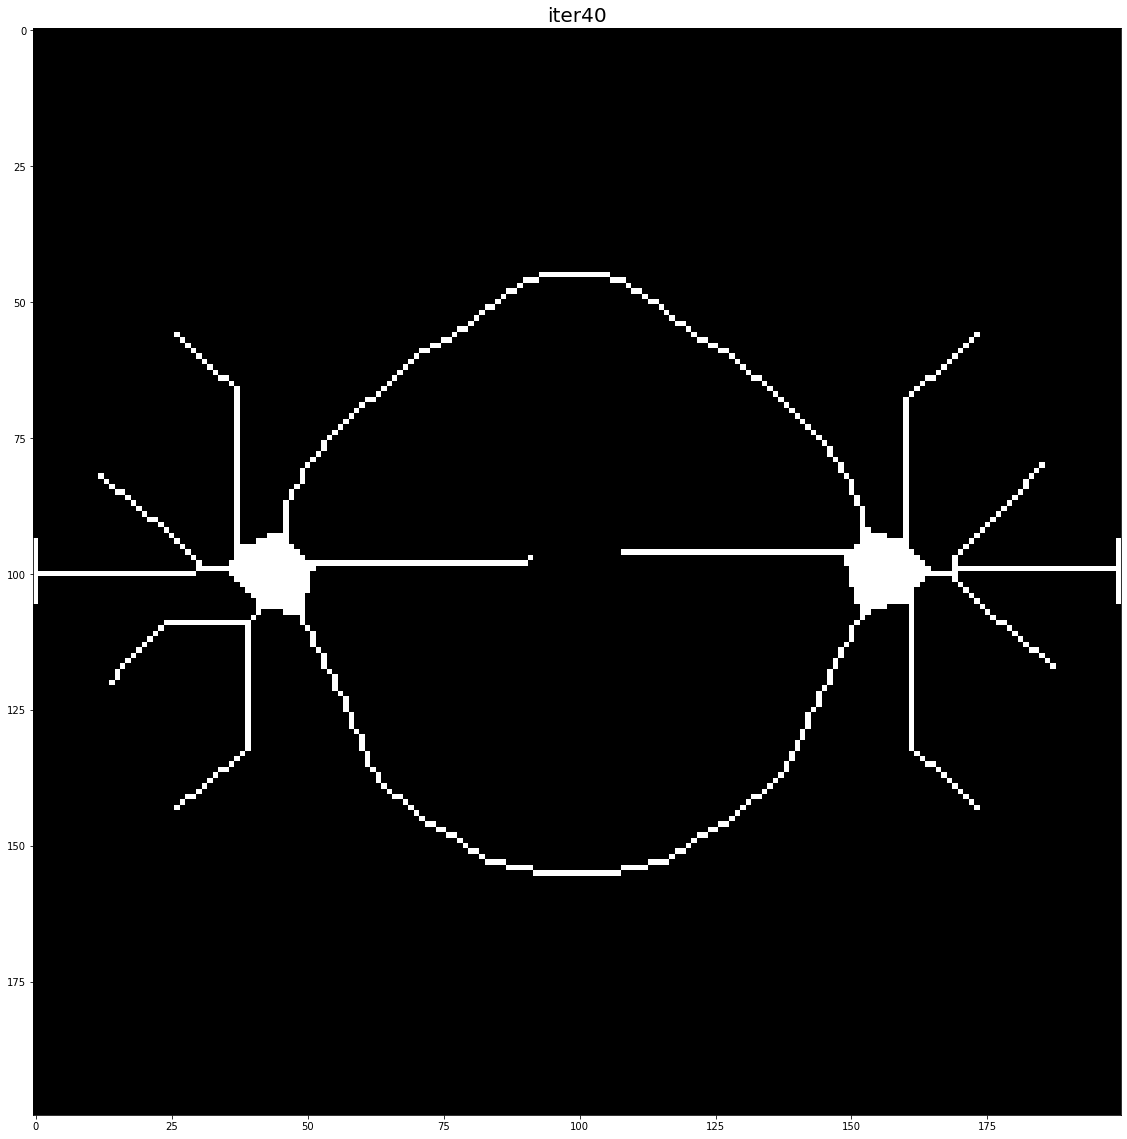

at iter 40 error 0.001875
at iter 41 error 0.00155
at iter 42 error 0.00135
at iter 43 error 0.001125
at iter 44 error 0.001025
at iter 45 error 0.000725
at iter 46 error 0.00035
at iter 47 error 0.00015


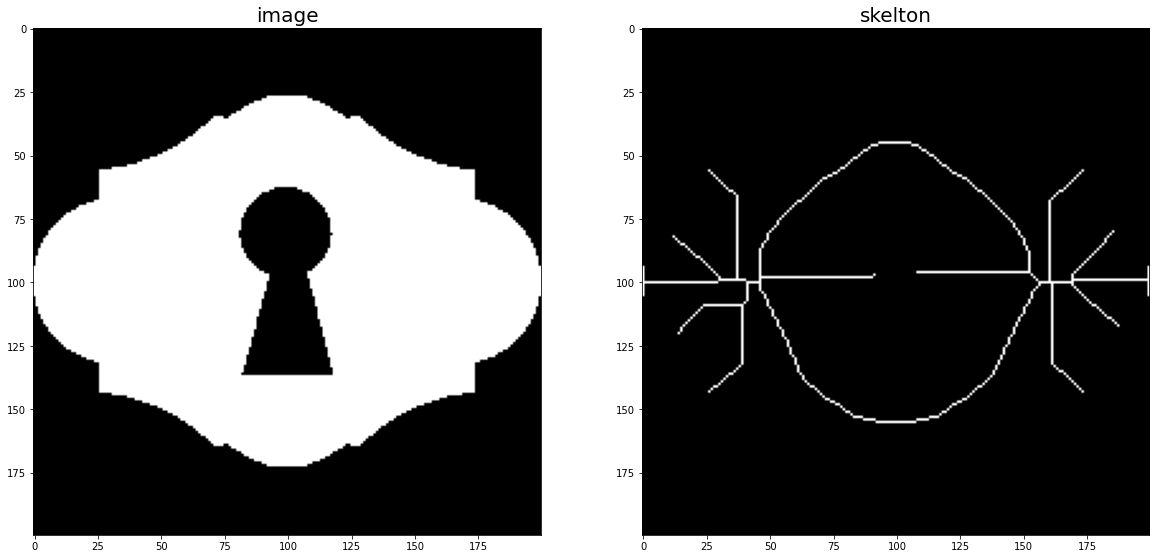

In [10]:
img = cv2.imread('../images/keyhole.jpg', 0)
img = 255 - img
img=cv2.resize(img,(200,200))
img = (img < 127).astype(np.uint8)
images = []
images.append(img)
ske_img = skeletonization(img,SE1,SE2,0.00001)
images.append(ske_img)
display_img_arr(images, 1, 2, (20, 20), ['image','skelton'])

**Observations** Change observed betweeen successive iterations was very low of skeletonization.  <br>
Keyhole took lesser number of iterations to converge than dragon or butterfly images